<a href="https://colab.research.google.com/github/prashanthi411/Fraud-Detection-in-the-Financial-Domain/blob/master/Detection_of_Fraud_in_the_Financial_Domain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounting drive onto notebook

In [0]:
from google.colab import drive  
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Reading from .csv file

In [0]:
path = "/content/drive/My Drive/data/PS_20174392719_1491204439457_log.csv"
f = open(path)
lines = f.read().splitlines()			
lines = [i.split(",") for i in lines]

data = 0
for i in range(1,len(lines)):
	data+=int(lines[i][9])

Importing packages

In [0]:
import sklearn
import imblearn
import random
from imblearn.over_sampling import SMOTE
from collections import Counter

print(lines[0])
print(data)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']
8213


Cleaning data - converting them to appropriate types

In [0]:
for j in range(1,len(lines)):
  for i in range(11):
    if((i!=1)&(i!=3)&(i!=6)):
      if((i==0)|(i==9)|(i==10)):
        lines[j][i] = int(lines[j][i])
      else:
        lines[j][i] = float(lines[j][i])
lines[1]        


[1,
 'PAYMENT',
 9839.64,
 'C1231006815',
 170136.0,
 160296.36,
 'M1979787155',
 0.0,
 0.0,
 0,
 0]

Hot Encoding categorical data

In [0]:
transaction_type = {'CASH_IN':[1,0,0,0,0], 'CASH_OUT':[0,1,0,0,0], 'DEBIT':[0,0,1,0,0], 'PAYMENT':[0,0,0,1,0], 'TRANSFER':[0,0,0,0,1]}

data = lines[1:]
random.shuffle(data)
y = []
x = []

for i in data:
  y+=[i[9]]
  x+=[transaction_type[i[1]]+i[2:3]+i[4:6]+i[7:9]]

print(x[8])
Counter(y)

[0, 1, 0, 0, 0, 54797.11, 0.0, 0.0, 575783.69, 630580.8]


Counter({0: 6354407, 1: 8213})

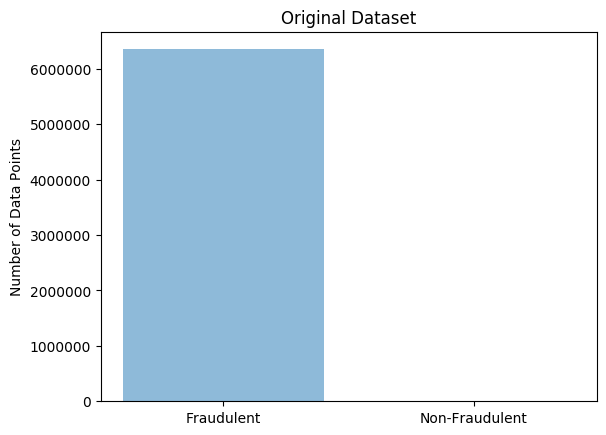

In [0]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Fraudulent', 'Non-Fraudulent')
y_pos = np.arange(len(objects))
counter = Counter(y)
performance = [counter[0],counter[1]]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Data Points')
plt.title('Original Dataset')

plt.show()

Splitting data into training and testing data

In [0]:
x_train = x
y_train = y

Oversampling training data using SMOTE

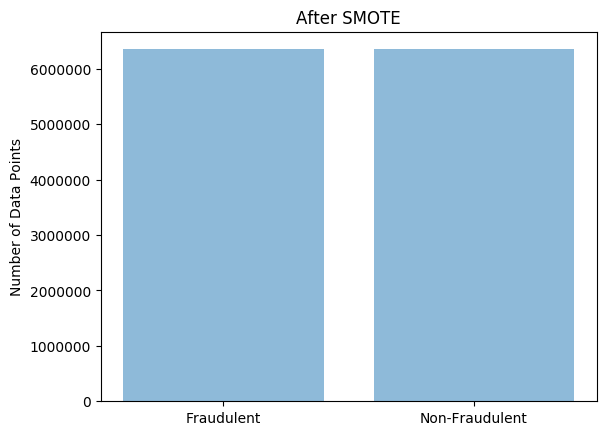

In [0]:
sme = SMOTE(random_state=42)
X_res, y_res = sme.fit_resample(x_train, y_train)

counter = Counter(y_res)

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Fraudulent', 'Non-Fraudulent')
y_pos = np.arange(len(objects))
performance = [counter[0],counter[1]]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Data Points')
plt.title('After SMOTE')

plt.show()

In [0]:
N = len(y_res)
print(N)

12708814


RANDOM FOREST CLASSIFIER


In [0]:
# RANDOM FOREST CLASSIFIER 
from sklearn.ensemble import RandomForestClassifier
dec = RandomForestClassifier(n_estimators = 50, criterion = "entropy", n_jobs = -1 )
dec = dec.fit(x_train, y_train)
print("done")

done


In [0]:
# from sklearn.metrics import classification_report, confusion_matrix
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

NameError: ignored

CLASSIFICATION DONE

CLUSTERING---

In [0]:
non_fraud = []

for i in range(len(x_train)):
  if(y_train[i]==0):
    non_fraud.append(x_train[i])
print(len(non_fraud))

6354407


COMPUTING AVG EUCLEDIAN DISTANCE BETWEEN PAIRS OF POINTS FOR A SET OF ALL POINTS

---------DBSCAN CLUSTERING ON NON-FRAUDULENT DATA-----------

In [0]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn import metrics 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

db = DBSCAN(eps=3000, min_samples=12).fit(non_fraud[:100000]) 
print(db.labels_) 
print("done")

[ 0 -1  0 ... -1 -1 -1]
done


In [0]:
from collections import Counter
print(Counter(db.labels_))
n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0) 
print(n_clusters_)

Counter({-1: 69117, 0: 29360, 4: 251, 1: 85, 11: 67, 6: 65, 27: 57, 17: 55, 3: 48, 34: 40, 20: 35, 30: 32, 22: 29, 14: 28, 13: 28, 38: 28, 36: 26, 19: 25, 40: 24, 10: 22, 18: 21, 2: 20, 26: 20, 5: 19, 48: 18, 21: 18, 53: 18, 23: 18, 44: 18, 12: 17, 43: 17, 16: 16, 32: 16, 8: 16, 51: 16, 25: 15, 46: 15, 41: 14, 54: 14, 28: 14, 24: 14, 50: 13, 31: 13, 15: 13, 42: 13, 45: 13, 9: 12, 37: 12, 49: 12, 58: 12, 7: 12, 29: 12, 55: 12, 52: 12, 35: 12, 57: 12, 33: 12, 47: 11, 56: 11, 39: 5})
59


In [0]:
t = input("Enter transaction: ")
test = t.split(",")

for i in range(11):
  if((i!=1)&(i!=3)&(i!=6)):
    if((i==0)|(i==9)|(i==10)):
      test[i] = int(test[i])
    else:
      test[i] = float(test[i])

x_test=transaction_type[test[1]]+test[2:3]+test[4:6]+test[7:9]

print(x_test)

Enter transaction: 1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
[0, 0, 0, 0, 1, 181.0, 181.0, 0.0, 0.0, 0.0]


In [0]:
y_test = dec.predict([x_test] )
eps = 3000
if(y_test == 1):
  print("Fraudulent")
else:
  flag = 0
  for i in db.core_sample_indices_:
    dist = 0
    for k in range(10):
      dist = dist+pow((non_fraud[i][k] - non_fraud[j][k]),2)
    dist = math.sqrt(dist)
    if(dist<eps):
      flag = 1
      break
  if(flag == 0):
    print("Fraudulent")
  else:
    print("Non - Fraudulent")


Fraudulent
